# Метод градиентного спуска для одной переменной

это метод оптимизации функций одной или многих переменных.

    Оптимизация - в математике, информатике и исследовании операций задача нахождения экстремума (мин или макс) целевой функции в некоторой области конечномерного векторного пространства, ограниченной набором линейных и/или нелинейных равенств и/или неравенств.

## Как работает для одной переменной?

    Нам необходимо добиться перемещения по оси X в сторону минимума. Для этого можно использовать производную функции. Известно, что знак первой производной позволяет определить, где находиться точка минимума. Для этого справа от потенциальной точки производная должна иметь положительный знак (возрастать), а слева иметь отрицательный знак (убывать).

    Но при этом, если мы должны двигаться к минимуму и находимся слева от него, то двигаться нам нужно вправо(+). То есть нам нужно брать производную с обратным знаком. Аналогично, если движемся слева(-).

    То есть самую простую формулу для градиентного спуска можно представить следующим образом:

$$
\begin{align}
x_{n+1} = x_n - f'(x_n) 
\end{align}
$$

    Однако большие значения производных слишком вредят движению (размерём это ниже), чтобы избежать сложностей вводиться поправочный коэффициент \begin{align} \lambda \end{align}

$$
\begin{align}
x_{n+1} = x_n - \lambda * f'(x_n) 
\end{align}
$$

    Этот коэффициент называют скоростью обучения.

(!) Спрятан текст (!)
<!-- \begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}
 -->

<!-- $$
\begin{array}{c}
y_1 \\\
y_2 \mathtt{t}_i \\\
z_{3,4}
\end{array}
$$ -->

<!-- $$\begin{eqnarray}
x' &=& &x \sin\phi &+& z \cos\phi \\
z' &=& - &x \cos\phi &+& z \sin\phi \\
\end{eqnarray}$$ -->

## Практическая реализация

In [5]:
#import time
import numpy as np
import matplotlib.pyplot as plt
"""%matplotlib inline"""

'%matplotlib inline'

### Функции для работы

$$
\begin{array}{c}
f(x) = x^2 - 6 * x + 5 \\
\frac{\partial f}{\partial x} = f'(x) = 2 * x - 6 \\
f_2(x) = x^2 + sin(x) \\
f_2'(x) = 2 * x + cos(x) \\
\end{array}
$$

In [7]:
def f(x):
    return x*x - 6*x + 5

def dfdx(x):
    return 2*x - 6

In [8]:
def f2(x):
    return x*x + 15*np.sin(x)

def df2dx(x):
    return 2*x + 15*np.cos(x)

### Разбор градиентного спуска

In [13]:
N = 20 #количество итераций
lr = 0.9 #скорость оптимизации (learning rate)

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: -3.9934867828206553 в точке 2.9192954946775207


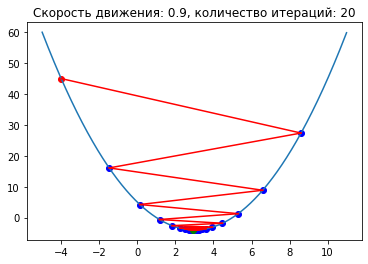

In [19]:
fig, ax = plt.subplots() #создание графика, доступ к фигуре и осям
ax.set_title(f'Скорость движения: {lr}, количество итераций: {N}')

x_plot = np.arange(-5, 11, 0.01) #разметка на графике от -5 до 11 с шагом 0.01
y_plot = [f(x) for x in x_plot]
ax.plot(x_plot, y_plot)

xc = -4 #начальное значение
print(f'Начальное значение минимума: {f(xc)} в точке {xc}')

ax.scatter(xc, f(xc), c='r') #обозначить точку на графике красным цветом

for _ in range(N):
    x0 = xc #нужно только для графика
    
    xc = xc - lr * dfdx(xc) #сам по себе градиентный спуск
    
    ax.scatter(xc, f(xc), c='b') #нужно только для графика
    ax.plot([x0,xc], [f(x0), f(xc)], c='r') #нужно только для графика

ax.scatter(xc, f(xc), c='g')
print(f'Финальное значение минимума: {f(xc)} в точке {xc}')

plt.show()

Метод градиентного спуска позволяет получить некоторое приблизительное значение минимума.

### Обёртка градиентного спуска функцией

In [20]:
def gd(N ,lr, min = -5, max = 11, f=f, dfdx=dfdx, xc=-4):
    fig, ax = plt.subplots()
    ax.set_title(f'Скорость движения: {lr}, количество итераций: {N}')
    
    x_plot = np.arange(min, max, 0.01)
    y_plot = [f(x) for x in x_plot]
    ax.plot(x_plot, y_plot)
    
    print(f'Начальное значение минимума: {f(xc)} в точке {xc}')
    
    ax.scatter(xc, f(xc), c='r')
    
    for _ in range(N):
        x0 = xc #нужно только для графика
    
        xc = xc - lr * dfdx(xc) #сам по себе градиентный спуск
    
        ax.scatter(xc, f(xc), c='b') #нужно только для графика
        ax.plot([x0,xc], [f(x0), f(xc)], c='r') #нужно только для графика

    ax.scatter(xc, f(xc), c='g')

    print(f'Финальное значение минимума: {f(xc)} в точке {xc}')

    plt.show()

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: -3.9934867828206553 в точке 2.9192954946775207


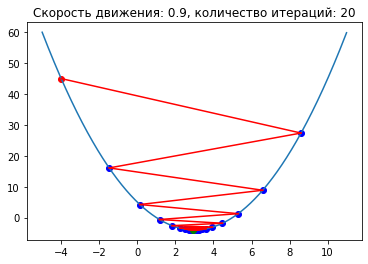

In [21]:
gd(N, lr)

### Проверка различных скоростей обучения

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: -3.9934867828206553 в точке 2.919295494677521


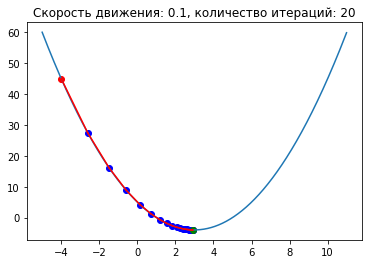

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: -3.9999999344992787 в точке 2.9997440689091954


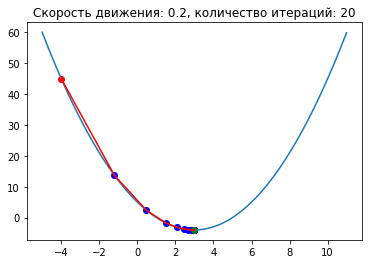

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: -3.9999999999999964 в точке 2.999999923034186


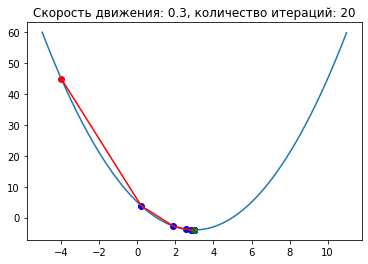

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: -3.9999999999999982 в точке 2.9999999999999267


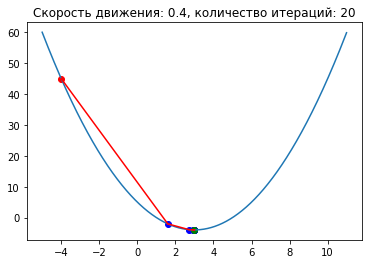

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: -4.0 в точке 3.0


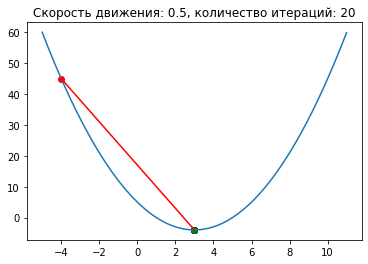

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: -3.9999999999999982 в точке 2.9999999999999267


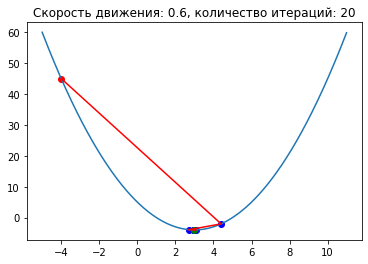

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: -3.9999999999999964 в точке 2.999999923034186


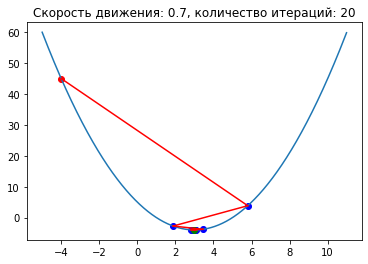

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: -3.9999999344992787 в точке 2.9997440689091954


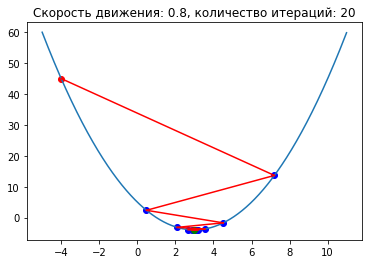

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: -3.9934867828206553 в точке 2.9192954946775207


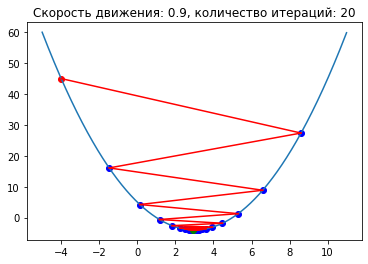

In [22]:
for i in range(1, 10):
    gd(20, i/10)

Начальное значение минимума: 45 в точке -4
Финальное значение минимума: 500.0001789191703 в точке -19.449948305489933


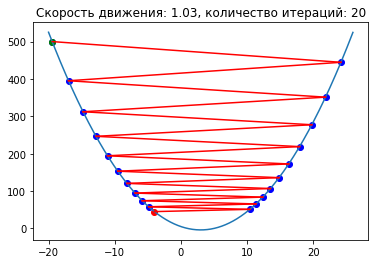

In [23]:
gd(20, 1.03, -20, 26)

Т.о. скорость обучения - важный параметр, от которого зависит качество результата.

### Сложности оптимизации (локальные минимумы)

Начальное значение минимума: 91.83968333665945 в точке 10
Финальное значение минимума: 4.62178832936184 в точке 4.240869994141571


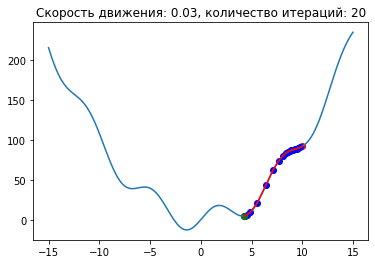

In [26]:
gd(N, 0.03, min=-15, max=15, f=f2, dfdx=df2dx, xc=10)

Начальное значение минимума: 39.38386411994708 в точке -5
Финальное значение минимума: -12.823616841551932 в точке -1.3851303718795267


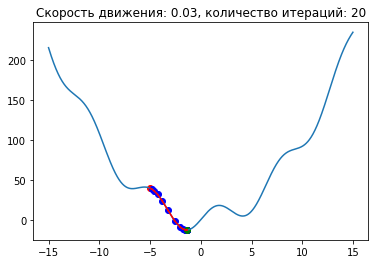

In [27]:
gd(N, 0.03, min=-15, max=15, f=f2, dfdx=df2dx, xc=-5)

Градиентный спуск позволяет спуститься до ближайшего локального минимума.